problem statement:

Problem statement : predict the sales of retail stores Target: sales Error metrics: MSE bold text

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/regression 3/regression/Sales of retail store/train_data.csv')

In [4]:
test = pd.read_csv('/content/drive/MyDrive/regression 3/regression/Sales of retail store/test_data.csv')

In [6]:
week_id = pd.read_csv('/content/drive/MyDrive/regression 3/regression/Sales of retail store/date_to_week_id_map.csv')

In [7]:
df1 = pd.merge(train,week_id, how='outer')

In [8]:
df2 = pd.merge(test,week_id, how='outer')

In [10]:
df1.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id
0,2012-01-01,74.0,11.0,others,111.0,Maharashtra,0.0,49
1,2012-01-01,337.0,11.0,others,111.0,Maharashtra,1.0,49
2,2012-01-01,423.0,12.0,others,111.0,Maharashtra,0.0,49
3,2012-01-01,432.0,12.0,others,111.0,Maharashtra,0.0,49
4,2012-01-01,581.0,21.0,fast_moving_consumer_goods,111.0,Maharashtra,0.0,49


In [11]:
df2.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id
0,1.0,2014-03-01,74.0,11.0,others,111.0,Maharashtra,162
1,2.0,2014-03-01,337.0,11.0,others,111.0,Maharashtra,162
2,3.0,2014-03-01,423.0,12.0,others,111.0,Maharashtra,162
3,4.0,2014-03-01,432.0,12.0,others,111.0,Maharashtra,162
4,5.0,2014-03-01,581.0,21.0,fast_moving_consumer_goods,111.0,Maharashtra,162


In [14]:
df1['date']=pd.to_datetime(df1['date'],format='%Y-%m-%d')

In [15]:
df2['date']=pd.to_datetime(df2['date'],format='%Y-%m-%d')

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395031 entries, 0 to 395030
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   395031 non-null  datetime64[ns]
 1   product_identifier     395000 non-null  float64       
 2   department_identifier  395000 non-null  float64       
 3   category_of_product    395000 non-null  object        
 4   outlet                 395000 non-null  float64       
 5   state                  395000 non-null  object        
 6   sales                  395000 non-null  float64       
 7   week_id                395031 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 27.1+ MB


In [16]:
df1.isnull().sum()

date                      0
product_identifier       31
department_identifier    31
category_of_product      31
outlet                   31
state                    31
sales                    31
week_id                   0
dtype: int64

In [18]:
categorical_list  = ['category_of_product','state']

In [20]:
for i in categorical_list:
  df1[i]=df1[i].astype('category').cat.codes 

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395031 entries, 0 to 395030
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   395031 non-null  datetime64[ns]
 1   product_identifier     395000 non-null  float64       
 2   department_identifier  395000 non-null  float64       
 3   category_of_product    395031 non-null  int8          
 4   outlet                 395000 non-null  float64       
 5   state                  395031 non-null  int8          
 6   sales                  395000 non-null  float64       
 7   week_id                395031 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), int8(2)
memory usage: 21.9 MB


In [23]:
df1['product_identifier'] = df1['product_identifier'].fillna(df1['product_identifier'].median())
df1['department_identifier'] = df1['department_identifier'].fillna(df1['department_identifier'].median())
df1['category_of_product'] = df1['category_of_product'].fillna(df1['category_of_product'].median())
df1['outlet'] = df1['outlet'].fillna(df1['outlet'].median())
df1['state'] = df1['state'].fillna(df1['state'].median())
df1['sales'] = df1['sales'].fillna(df1['sales'].median())

In [24]:
df1.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
dtype: int64

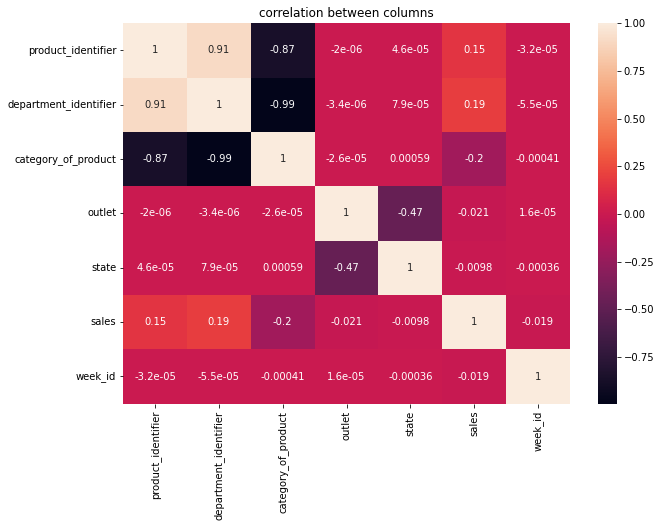

In [26]:
# Checking the correlation
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(),annot=True)
plt.title('correlation between columns')
plt.show()

In [27]:
df2.isnull().sum()

id                       790
date                       0
product_identifier       790
department_identifier    790
category_of_product      790
outlet                   790
state                    790
week_id                    0
dtype: int64

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16290 entries, 0 to 16289
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     15500 non-null  float64       
 1   date                   16290 non-null  datetime64[ns]
 2   product_identifier     15500 non-null  float64       
 3   department_identifier  15500 non-null  float64       
 4   category_of_product    15500 non-null  object        
 5   outlet                 15500 non-null  float64       
 6   state                  15500 non-null  object        
 7   week_id                16290 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [29]:
categorical_list  = ['category_of_product','state']

In [30]:
for i in categorical_list:
  df2[i]=df2[i].astype('category').cat.codes 

In [32]:
df2['id'] = df2['id'].fillna(df2['id'].median())
df2['product_identifier'] = df2['product_identifier'].fillna(df2['product_identifier'].median())
df2['department_identifier'] = df2['department_identifier'].fillna(df2['department_identifier'].median())
df2['category_of_product'] = df2['category_of_product'].fillna(df2['category_of_product'].median())
df2['outlet'] = df2['outlet'].fillna(df2['outlet'].median())
df2['state'] = df2['state'].fillna(df2['state'].median())

In [33]:
df2.isnull().sum()

id                       0
date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
week_id                  0
dtype: int64

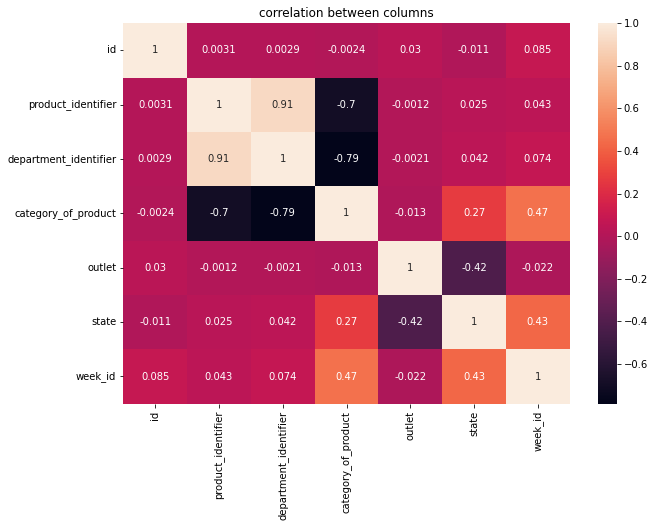

In [35]:
# Checking the correlation
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(),annot=True)
plt.title('correlation between columns')
plt.show()

In [38]:

# Split the dataset into training and testing sets
train_data, test_data = np.split(df1.sample(frac=1, random_state=42), [int(0.8 * len(df1))])

# Define the input features and target variable
X_train = train_data.drop([ "sales"], axis=1)
y_train = train_data["sales"]
X_test = test_data.drop([ "sales"], axis=1)
y_test = test_data["sales"]

# Define a function to calculate the mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Define a function to split the data based on a given feature and threshold value
def split_data(X, y, feature, threshold):
    left_mask = X[feature] <= threshold
    right_mask = X[feature] > threshold
    X_left, y_left = X.loc[left_mask], y.loc[left_mask]
    X_right, y_right = X.loc[right_mask], y.loc[right_mask]
    return X_left, y_left, X_right, y_right

# Define a function to find the best split point for a given feature
def find_best_split(X, y, feature):
    # Sort the data by the feature
    X_sorted = X.sort_values(feature)
    y_sorted = y[X_sorted.index]
    # Initialize the best split point and lowest mse
    best_split = None
    lowest_mse = float("inf")
    # Loop through each unique value of the feature
    for threshold in X_sorted[feature].unique():
        # Split the data at the current threshold
        X_left, y_left, X_right, y_right = split_data(X_sorted, y_sorted, feature, threshold)
        # Calculate the mse for the current split
        mse = mean_squared_error(y_left, y_left.mean()) + mean_squared_error(y_right, y_right.mean())
        # Update the best split and lowest mse if the current mse is lower
        if mse < lowest_mse:
            best_split = (feature, threshold)
            lowest_mse = mse
    return best_split, lowest_mse

In [39]:
# Define a class for decision tree nodes
class Node:
    def __init__(self, X, y, depth=0, max_depth=5, min_samples_split=2):
        self.X = X
        self.y = y
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_threshold = None
        self.prediction = y.mean()
        # Stop splitting if the node reaches the maximum depth or minimum number of samples
        if depth < max_depth and len(X) >= min_samples_split:
            # Find the best split point among all features
            best_split, lowest_mse = min([find_best_split(X, y, feature) for feature in X.columns], key=lambda x: x[1])
            # Create left and right child nodes and continue splitting recursively
            if best_split is not None:
                self.split_feature, self.split_threshold = best_split
                X_left, y_left, X_right, y_right = split_data(X, y, self.split_feature, self.split_threshold)
                self.left = Node(X_left, y_left, depth+1, max_depth, min_samples_split)
                self.right = Node(X_right, y_right, depth+1, max_depth, min_samples_split)
                self.prediction = None

    def predict_row(self, row):
        # Recursively traverse the tree to find the prediction for a given row
        if self.prediction is not None:
            return self.prediction
        elif row[self.split_feature] <= self.split_threshold:
            return self.left.predict_row(row)
        else:
            return self.right.predict_row(row)

    def predict(self, X):
        # Make predictions for all rows in X
        return np.array([self.predict_row(X.iloc[i]) for i in range(len(X))])

# Train the decision tree on the training data
tree = Node(X_train, y_train)

# Make predictions on the testing data
y_pred = tree.predict(X_test)



In [40]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12.566104702126147


In [41]:
y_pred

array([1.22643892, 1.22643892, 1.22643892, ..., 1.22643892, 1.22643892,
       1.22643892])

In [42]:
pred_df = pd.DataFrame({'sales':y_pred})

In [43]:
pred_df.head()

,sales
0,1.226439
1,1.226439
2,1.226439
3,1.226439
4,1.226439


In [44]:
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)

Predicted values: [1.22643892 1.22643892 1.22643892 ... 1.22643892 1.22643892 1.22643892]
Actual values: [3. 0. 0. ... 0. 0. 0.]
